<a href="https://colab.research.google.com/github/amanjain-iitb/Stock_Prediction/blob/main/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/stock_data/Nifty(1.04.19-30.05.21).csv')

In [ ]:
df['Date']=pd.to_datetime(df.Date)
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Volume
2019-04-01,2019-04-01,11665.20,11738.10,11644.75,11669.15,379572660
2019-04-02,2019-04-02,11711.55,11729.35,11655.85,11713.20,386131413
2019-04-03,2019-04-03,11735.30,11761.00,11629.15,11643.95,365760070
2019-04-04,2019-04-04,11660.20,11662.55,11559.20,11598.00,349029830
2019-04-05,2019-04-05,11638.40,11689.65,11609.50,11665.95,266665797
...,...,...,...,...,...,...
2021-06-24,2021-06-24,15737.30,15821.40,15702.70,15790.45,316662241
2021-06-25,2021-06-25,15839.35,15870.80,15772.30,15860.35,314614380
2021-06-28,2021-06-28,15915.35,15915.65,15792.15,15814.70,255099272
2021-06-29,2021-06-29,15807.50,15835.90,15724.05,15748.45,360334724


In [ ]:
X=df.reset_index()['Close']

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(np.array(X).reshape(-1,1))

In [ ]:
trainlen=math.floor(len(X)*0.6)
length=len(X)

In [ ]:
train = X[0:trainlen,:]
test = X[trainlen:length,:1]
test

array([[0.44314082],
       [0.44947936],
       [0.44777213],
       [0.44680954],
       [0.43203172],
       [0.44034992],
       [0.45708924],
       [0.45988013],
       [0.44823223],
       [0.45542439],
       [0.46690883],
       [0.46761109],
       [0.47697663],
       [0.47814505],
       [0.48884247],
       [0.45734956],
       [0.46736893],
       [0.47520886],
       [0.47429471],
       [0.45085361],
       [0.45342051],
       [0.44885579],
       [0.44409129],
       [0.46482625],
       [0.46666667],
       [0.46371231],
       [0.47361061],
       [0.48362998],
       [0.47292045],
       [0.47157041],
       [0.44076765],
       [0.42903499],
       [0.42639545],
       [0.38688703],
       [0.41651532],
       [0.43798281],
       [0.43735924],
       [0.44040441],
       [0.46091537],
       [0.47137668],
       [0.49063446],
       [0.49989103],
       [0.51148444],
       [0.52112241],
       [0.5231505 ],
       [0.52358034],
       [0.52800581],
       [0.492

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 7s 524ms/step - loss: 0.0959 - val_loss: 0.0351
Epoch 2/100
4/4 [==============================] - 1s 172ms/step - loss: 0.0277 - val_loss: 0.0055
Epoch 3/100
4/4 [==============================] - 1s 179ms/step - loss: 0.0113 - val_loss: 0.1162
Epoch 4/100
4/4 [==============================] - 1s 173ms/step - loss: 0.0164 - val_loss: 0.1068
Epoch 5/100
4/4 [==============================] - 1s 177ms/step - loss: 0.0104 - val_loss: 0.0393
Epoch 6/100
4/4 [==============================] - 1s 177ms/step - loss: 0.0076 - val_loss: 0.0157
Epoch 7/100
4/4 [==============================] - 1s 174ms/step - loss: 0.0091 - val_loss: 0.0322
Epoch 8/100
4/4 [==============================] - 1s 176ms/step - loss: 0.0068 - val_loss: 0.0550
Epoch 9/100
4/4 [==============================] - 1s 190ms/step - loss: 0.0073 - val_loss: 0.0514
Epoch 10/100
4/4 [==============================] - 1s 183ms/step - loss: 0.0067 - val_loss: 0.0298
Epoch 11/

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

10927.287932429454

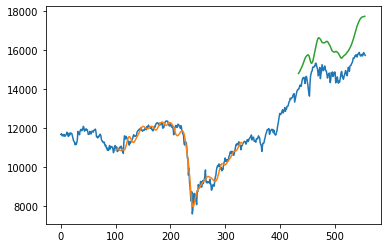

In [ ]:
look_back = time_step
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()